C:\Users\Bhanu Pratap Singh\AppData\Local\Temp\ipykernel_13724\1559341279.py:32: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  window = gaussian(N, std=sigma)
C:\Users\Bhanu Pratap Singh\AppData\Local\Temp\ipykernel_13724\1559341279.py:47: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time, freq, np.abs(S_matrix))


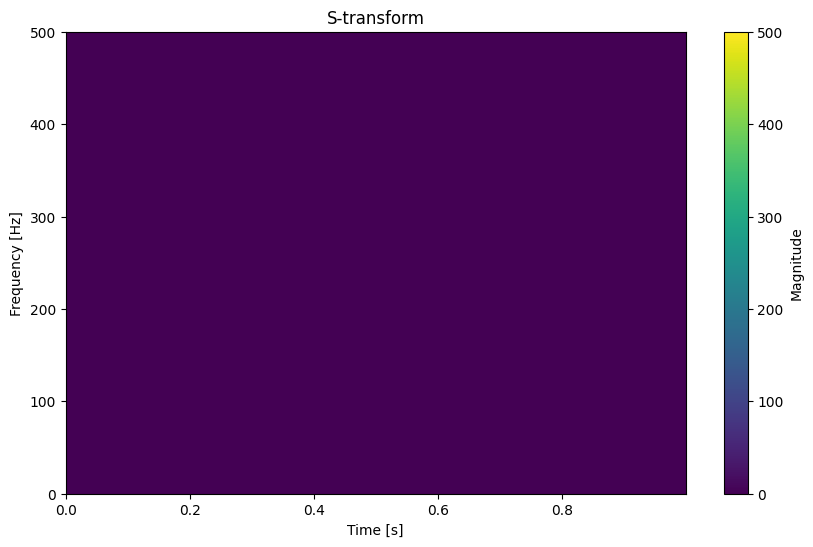

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian

def s_transform(signal, fs):
    """
    Perform the S-transform on a given signal.

    Parameters:
    signal : numpy array
        The input signal.
    fs : int or float
        The sampling frequency of the signal.

    Returns:
    S_matrix : numpy array
        The S-transform of the signal.
    time : numpy array
        The time vector corresponding to the S-transform.
    freq : numpy array
        The frequency vector corresponding to the S-transform.
    """
    N = len(signal)
    time = np.arange(N) / fs
    freq = np.fft.fftfreq(N, 1/fs)
    
    S_matrix = np.zeros((N, N), dtype=complex)
    
    for i in range(N):
        f = freq[i]
        sigma = 1 / (2 * np.pi * np.abs(f) + np.finfo(float).eps)
        window = gaussian(N, std=sigma)
        windowed_signal = signal * window
        S_matrix[:, i] = np.fft.fft(windowed_signal) * np.exp(-2j * np.pi * f * time)
    
    return S_matrix, time, freq

# Example usage:
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # Example signal

S_matrix, time, freq = s_transform(signal, fs)

# Plotting the S-transform
plt.figure(figsize=(10, 6))
plt.pcolormesh(time, freq, np.abs(S_matrix))
plt.title('S-transform')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude')
plt.ylim(0, fs / 2)
plt.show()


C:\Users\Bhanu Pratap Singh\AppData\Local\Temp\ipykernel_13724\1691734459.py:51: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time, freq, np.abs(S_matrix).T)


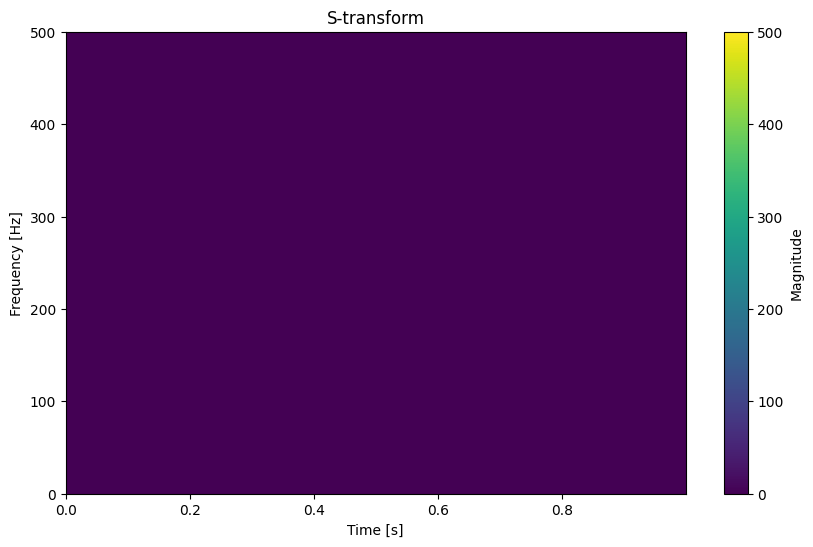

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def s_transform(signal, fs):
    """
    Perform the S-transform on a given signal.

    Parameters:
    signal : numpy array
        The input signal.
    fs : int or float
        The sampling frequency of the signal.

    Returns:
    S_matrix : numpy array
        The S-transform of the signal.
    time : numpy array
        The time vector corresponding to the S-transform.
    freq : numpy array
        The frequency vector corresponding to the S-transform.
    """
    N = len(signal)
    time = np.arange(N) / fs
    freq = np.fft.fftfreq(N, 1/fs)
    
    S_matrix = np.zeros((N, N), dtype=complex)
    
    for i in range(N):
        f = freq[i]
        if f != 0:
            sigma = 1 / (2 * np.pi * np.abs(f))
        else:
            sigma = 1 / (2 * np.pi * np.finfo(float).eps)
        
        gauss_window = np.exp(-0.5 * ((time - time[N // 2]) / sigma) ** 2)
        windowed_signal = signal * gauss_window
        S_matrix[:, i] = np.fft.fft(windowed_signal) * np.exp(-2j * np.pi * f * time)
    
    return S_matrix, time, freq

# Example usage:
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # Example signal

S_matrix, time, freq = s_transform(signal, fs)

# Plotting the S-transform
plt.figure(figsize=(10, 6))
plt.pcolormesh(time, freq, np.abs(S_matrix).T)
plt.title('S-transform')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude')
plt.ylim(0, fs / 2)
plt.show()


C:\Users\Bhanu Pratap Singh\AppData\Local\Temp\ipykernel_13724\3591341625.py:49: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time, freq, np.abs(S_matrix).T, shading='auto')


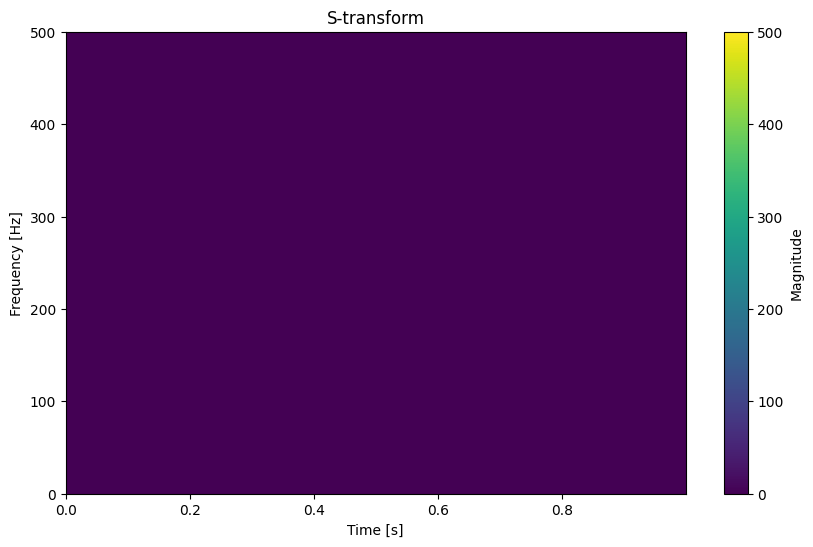

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def s_transform(signal, fs):
    """
    Perform the S-transform on a given signal.

    Parameters:
    signal : numpy array
        The input signal.
    fs : int or float
        The sampling frequency of the signal.

    Returns:
    S_matrix : numpy array
        The S-transform of the signal.
    time : numpy array
        The time vector corresponding to the S-transform.
    freq : numpy array
        The frequency vector corresponding to the S-transform.
    """
    N = len(signal)
    time = np.arange(N) / fs
    freq = np.fft.fftfreq(N, 1/fs)
    
    S_matrix = np.zeros((N, N), dtype=complex)
    
    for i, f in enumerate(freq):
        if f == 0:
            sigma = 1 / (2 * np.pi * np.finfo(float).eps)
        else:
            sigma = 1 / (2 * np.pi * np.abs(f))
        
        gauss_window = np.exp(-0.5 * ((time - time[N // 2]) / sigma) ** 2)
        windowed_signal = signal * gauss_window
        S_matrix[:, i] = np.fft.fft(windowed_signal) * np.exp(-2j * np.pi * f * time)
    
    return S_matrix, time, freq

# Example usage:
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # Example signal

S_matrix, time, freq = s_transform(signal, fs)

# Plotting the S-transform
plt.figure(figsize=(10, 6))
plt.pcolormesh(time, freq, np.abs(S_matrix).T, shading='auto')
plt.title('S-transform')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude')
plt.ylim(0, fs / 2)
plt.show()
